In [1]:
import sys
sys.path.append('python/')
import nercome
import numpy as np 
import pylab as plt

# Tutorial using EZmocks

Here we compare the performances of NERCOME (Joachimi 2017) on calculating covariance matrices using 1000 realisations of EZmock multipoles (Chang et al. 2020) used in the configuration space BAO and RSD analysis of eBOSS LRGs from DR16 (Bautista et al. 2020, Gil-Marín et al. 2020).

In [2]:
#-- Loading EZmock data. It contains 1000 realisations of mono-quad-hexa (117 bins total)
data = np.load('data/EZmock_eBOSS_LRGpCMASS_COMB_v7_syst_5mpc_recon.npy')
n_realisations, n_bins = data.shape

In [3]:
#-- Number of realisations to test
n_sims = [50, 100, 200, 400, 800, 1000]

eigv_sample = {}
eigv_nercome = {}


for n_sim in n_sims:
    #-- Calculating the usual sample covariance
    cov_sample = np.cov(data[:n_sim].T)
    eigv_sample[n_sim] = np.sort(np.linalg.eigvalsh(cov_sample))[::-1]
    
    #-- Calculating the NERCOME covariance
    #-- We fix this s value here but in the NERCOME method it is a best-fit 
    s = n_sim//3*2   
    cov_nercome = nercome.get_nercome_covariance(data[:n_sim], s=s, ndraws=500)
    eigv_nercome[n_sim] = np.sort(np.linalg.eigvalsh(cov_nercome))[::-1]

    

Text(0.5, 0, 'Eigenmode')

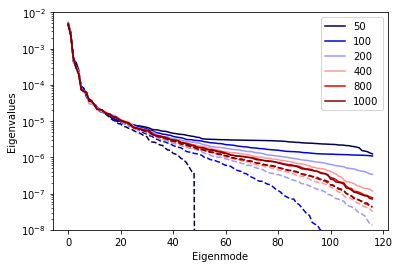

In [4]:
#-- Reproducing the equivalent of Fig. 3 of Joachimi 2017
colors = plt.cm.seismic(np.linspace(0, 1, len(n_sims)))
plt.figure()
for i in range(len(n_sims)):
    n_sim = n_sims[i]
    plt.plot(eigv_sample[n_sim], color=colors[i], ls='--')
    plt.plot(eigv_nercome[n_sim], color=colors[i], ls='-', label=f'{n_sim}')
plt.legend()
plt.yscale('log')
plt.ylim(1e-8, 1e-2)
plt.ylabel('Eigenvalues')
plt.xlabel('Eigenmode')